In [46]:
import pandas as pd
import duckdb
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [22]:
df_channel_perf= pd.read_csv("channel_performance.csv")
df_wbr_global = pd.read_csv("wbr_Global_data.csv")
df_wbr_regional = pd.read_csv("wbr_regional_data.csv")

In [23]:
df_channel_perf.shape        
df_channel_perf.info()     
df_channel_perf.head()
df_channel_perf.tail()
df_channel_perf.describe()   
df_channel_perf.describe(include="all") 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   channel                                 72 non-null     object 
 1   spend                                   54 non-null     float64
 2   month                                   72 non-null     object 
 3   visitors                                72 non-null     object 
 4   last_click_email_captures               72 non-null     object 
 5   last_click_add_to_cart                  72 non-null     int64  
 6   last_click_orders                       72 non-null     int64  
 7   cac                                     72 non-null     float64
 8   last_click_revenue                      72 non-null     float64
 9   email_capture_conversion_30days_window  54 non-null     float64
 10  email_capture_conversion_60days_windo   54 non-null     float64


,channel,spend,month,visitors,last_click_email_captures,last_click_add_to_cart,last_click_orders,cac,last_click_revenue,email_capture_conversion_30days_window,email_capture_conversion_60days_windo,Conversion Visitors to Email Captured,Conversion Visitor to Add To Cart,Conversion Visitors to Order
count,72,54.000000,72,72,72,72.000000,72.000000,72.000000,7.200000e+01,54.000000,54.000000,72,72,72
unique,4,NaN,18,72,72,NaN,NaN,NaN,NaN,NaN,NaN,71,71,63
top,Organic + Direct,NaN,2024-01-01,"234,285","7,092",NaN,NaN,NaN,NaN,NaN,NaN,4.882%,0.128%,0.154%
freq,18,NaN,4,1,1,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2
mean,NaN,272112.053333,NaN,NaN,NaN,1665.263889,333.055556,1090.411111,1.317523e+06,171.925926,243.722222,NaN,NaN,NaN
std,NaN,264297.091905,NaN,NaN,NaN,1376.053164,299.829853,880.709661,1.201929e+06,211.174599,299.585400,NaN,NaN,NaN
min,NaN,1290.120000,NaN,NaN,NaN,44.000000,1.000000,0.000000,2.783000e+03,5.000000,7.000000,NaN,NaN,NaN
25%,NaN,64854.372500,NaN,NaN,NaN,471.750000,60.000000,418.245000,2.380660e+05,17.250000,23.500000,NaN,NaN,NaN
50%,NaN,159315.255000,NaN,NaN,NaN,1358.500000,325.500000,978.600000,9.995630e+05,38.000000,50.500000,NaN,NaN,NaN
75%,NaN,473810.295000,NaN,NaN,NaN,2685.750000,553.250000,1550.785000,2.176708e+06,329.000000,494.250000,NaN,NaN,NaN


In [9]:
df_wbr_global.shape        
df_wbr_global.info()     
df_wbr_global.head()
df_wbr_global.tail()
df_wbr_global.describe()   
df_wbr_global.describe(include="all") 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         560 non-null    object
 1   Daily Spend  560 non-null    object
 2   Orders       560 non-null    int64 
 3   Bookings     560 non-null    object
 4   Visitors     560 non-null    object
dtypes: int64(1), object(4)
memory usage: 22.0+ KB


,Date,Daily Spend,Orders,Bookings,Visitors
count,560,560,560.000000,560,560
unique,560,557,NaN,560,555
top,1/1/2024,"$51,342",NaN,"$282,147","22,337"
freq,1,2,NaN,1,2
mean,NaN,NaN,106.671429,NaN,NaN
std,NaN,NaN,63.588620,NaN,NaN
min,NaN,NaN,42.000000,NaN,NaN
25%,NaN,NaN,76.000000,NaN,NaN
50%,NaN,NaN,94.500000,NaN,NaN
75%,NaN,NaN,118.250000,NaN,NaN


In [10]:
df_wbr_regional.shape        
df_wbr_regional.info()     
df_wbr_regional.head()
df_wbr_regional.tail()
df_wbr_regional.describe()   
df_wbr_regional.describe(include="all") 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9850 entries, 0 to 9849
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     0 non-null      float64
 1   Unnamed: 1     0 non-null      float64
 2   Date           9850 non-null   object 
 3   Customer Type  9850 non-null   object 
 4   Region         9850 non-null   object 
 5   Bookings       9850 non-null   object 
 6   Orders         9850 non-null   int64  
 7   Units          9850 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 615.8+ KB


,Unnamed: 0,Unnamed: 1,Date,Customer Type,Region,Bookings,Orders,Units
count,0.0,0.0,9850,9850,9850,9850,9850.000000,9850.000000
unique,NaN,NaN,561,4,9,6661,NaN,NaN
top,NaN,NaN,2025-05-14,1. New Members,US,$0,NaN,NaN
freq,NaN,NaN,27,3502,2240,737,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,6.940508,7.005584
std,NaN,NaN,NaN,NaN,NaN,NaN,23.371255,23.551023
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,4.000000


In [52]:
df = pd.read_csv("channel_performance.csv")

# Query with DuckDB
result = duckdb.query("""
    SELECT channel,
           SUM(last_click_orders) / sum(spend)::FLOAT AS cac,
           SUM(last_click_revenue)/sum(spend)::Float as roi, 
           SUM(last_click_orders ) AS total_conversions
    FROM df
    GROUP BY channel
    ORDER BY cac DESC
    """
).to_df()

print(result)

            channel       cac       roi  total_conversions
0        Google Ads  0.001240  4.569267            12717.0
1            FB Ads  0.000743  2.981805             1610.0
2       YouTube Ads  0.000412  1.984202              934.0
3  Organic + Direct       NaN       NaN             8719.0


In [39]:
import pandas as pd
import numpy as np
import warnings

# Optional: silence runtime warnings from NumPy
warnings.filterwarnings("ignore", category=RuntimeWarning)

# --- Load data ---
df = pd.read_csv("channel_performance.csv")

# Normalize column names
df.columns = [c.strip() for c in df.columns]

# Ensure month is datetime
df["month"] = pd.to_datetime(df["month"])

# Columns that must be numeric
numeric_cols = [
    "spend",
    "visitors",
    "last_click_email_captures",
    "last_click_add_to_cart",
    "last_click_orders",
    "last_click_revenue",
    "email_capture_conversion_30days_window",
    "email_capture_conversion_60days_windo",
    "cac",
]

# Clean numerics: remove thousands separators, '%' and cast to float
for col in numeric_cols:
    if col in df.columns:
        df[col] = (
            df[col]
            .astype(str)
            .str.replace(",", "", regex=False)
            .str.replace("%", "", regex=False)
            .str.strip()
            .replace({"": np.nan})
        )
        df[col] = pd.to_numeric(df[col], errors="coerce")

# Organic has NaN spend — treat as 0
if "spend" in df.columns:
    df["spend"] = df["spend"].fillna(0.0)

# --- Helper for safe correlation ---
def safe_corr(x, y):
    if x is None or y is None:
        return np.nan
    if x.nunique(dropna=True) <= 1 or y.nunique(dropna=True) <= 1:
        return np.nan
    return x.corr(y)

# =========================
# 1) Channel Summary
# =========================
summary = (
    df.groupby("channel", dropna=False)
      .agg(
          spend=("spend", "sum"),
          visitors=("visitors", "sum"),
          orders=("last_click_orders", "sum"),
          revenue=("last_click_revenue", "sum"),
      )
      .reset_index()
)

# Safe CAC and Conversion
summary["CAC"] = np.where(summary["orders"] > 0, summary["spend"] / summary["orders"], np.nan)
summary["ConvRate"] = np.where(summary["visitors"] > 0, summary["orders"] / summary["visitors"], np.nan)

# =========================
# 2) Monthly Trends
# =========================
monthly = (
    df.groupby([pd.Grouper(key="month", freq="ME"), "channel"])
      .agg(
          spend=("spend","sum"),
          orders=("last_click_orders","sum"),
          revenue=("last_click_revenue","sum"),
      )
      .reset_index()
)
monthly["CAC"] = np.where(monthly["orders"] > 0, monthly["spend"] / monthly["orders"], np.nan)

# =========================
# 3) Correlation (Spend vs Orders) by Channel
# =========================
corrs = df.groupby("channel").apply(
    lambda g: safe_corr(g["spend"], g["last_click_orders"]),
    include_groups=False
)

# =========================
# 4) Paid vs Organic correlation (monthly-aligned)
# =========================
df["_type"] = np.where(df["channel"].eq("Organic + Direct"), "Organic", "Paid")
paid_org_monthly = (
    df.groupby([pd.Grouper(key="month", freq="ME"), "_type"])["last_click_orders"]
      .sum()
      .unstack("_type")
      .fillna(0.0)
      .sort_index()
)

# Ensure both columns exist
for col in ["Paid", "Organic"]:
    if col not in paid_org_monthly.columns:
        paid_org_monthly[col] = 0.0

paid_vs_org_corr = safe_corr(paid_org_monthly["Paid"], paid_org_monthly["Organic"])

# =========================
# 5) Lag Analysis (example: 1-month lead of spend vs orders)
# =========================
def lag_corr(g: pd.DataFrame, lag: int = 1) -> float:
    g = g.sort_values("month")
    return safe_corr(g["spend"], g["last_click_orders"].shift(-lag))

lagged_corrs = df.groupby("channel").apply(
    lambda g: lag_corr(g, lag=1),
    include_groups=False
)

# --- (Optional) Print outputs ---
print(summary)
print(monthly)
print("Spend vs Orders corr by channel:\n", corrs)
print("Paid vs Organic corr (monthly):", paid_vs_org_corr)
print("Lag(1) corr spend->orders by channel:\n", lagged_corrs)


            channel        spend  visitors  orders     revenue          CAC  \
0            FB Ads   2167847.08   3675412    1610   6464098.0  1346.488870   
1        Google Ads  10256462.52   1938001   12717  46864519.0   806.515886   
2  Organic + Direct         0.00   5604223    8719  37029412.0     0.000000   
3       YouTube Ads   2269741.28   5741010     934   4503624.0  2430.129850   

   ConvRate  
0  0.000438  
1  0.006562  
2  0.001556  
3  0.000163  
        month           channel      spend  orders    revenue          CAC
0  2024-01-31            FB Ads   27889.50      27    77699.0  1032.944444
1  2024-01-31        Google Ads  279224.05     467  1282303.0   597.910171
2  2024-01-31  Organic + Direct       0.00     360  1037281.0     0.000000
3  2024-01-31       YouTube Ads    1290.12       1     2783.0  1290.120000
4  2024-02-29            FB Ads   39846.47      51   135766.0   781.303333
..        ...               ...        ...     ...        ...          ...
67 2025-0

In [40]:
monthly[monthly["channel"]=="YouTube Ads"]

,month,channel,spend,orders,revenue,CAC
3,2024-01-31,YouTube Ads,1290.12,1,2783.0,1290.120000
7,2024-02-29,YouTube Ads,15360.90,10,29354.0,1536.090000
11,2024-03-31,YouTube Ads,7517.62,4,14526.0,1879.405000
15,2024-04-30,YouTube Ads,24451.47,12,41207.0,2037.622500
19,2024-05-31,YouTube Ads,56326.00,17,87322.0,3313.294118
23,2024-06-30,YouTube Ads,29621.08,16,64079.0,1851.317500
27,2024-07-31,YouTube Ads,42496.09,25,93358.0,1699.843600
31,2024-08-31,YouTube Ads,181725.33,84,377705.0,2163.396786
35,2024-09-30,YouTube Ads,62955.04,26,110277.0,2421.347692
39,2024-10-31,YouTube Ads,37274.53,18,65452.0,2070.807222


In [41]:
monthly[monthly["channel"]=="FB Ads"]

,month,channel,spend,orders,revenue,CAC
0,2024-01-31,FB Ads,27889.50,27,77699.0,1032.944444
4,2024-02-29,FB Ads,39846.47,51,135766.0,781.303333
8,2024-03-31,FB Ads,94199.38,85,250846.0,1108.228000
12,2024-04-30,FB Ads,78373.66,77,245805.0,1017.839740
16,2024-05-31,FB Ads,182075.79,132,570084.0,1379.362045
20,2024-06-30,FB Ads,93312.63,78,297865.0,1196.315769
24,2024-07-31,FB Ads,73910.60,56,197945.0,1319.832143
28,2024-08-31,FB Ads,77623.58,57,225121.0,1361.817193
32,2024-09-30,FB Ads,84216.80,72,273306.0,1169.677778
36,2024-10-31,FB Ads,61639.10,49,185663.0,1257.940816


In [42]:
monthly[monthly["channel"]=="Google Ads"]

,month,channel,spend,orders,revenue,CAC
1,2024-01-31,Google Ads,279224.05,467,1282303.0,597.910171
5,2024-02-29,Google Ads,264887.49,475,1313599.0,557.657874
9,2024-03-31,Google Ads,477058.25,676,1969466.0,705.707470
13,2024-04-30,Google Ads,464066.43,719,2169737.0,645.433143
17,2024-05-31,Google Ads,973699.16,1125,4421151.0,865.510364
21,2024-06-30,Google Ads,714418.72,927,3367327.0,770.678231
25,2024-07-31,Google Ads,664583.25,888,3162090.0,748.404561
29,2024-08-31,Google Ads,570363.22,668,2534017.0,853.837156
33,2024-09-30,Google Ads,480082.09,606,2347544.0,792.214670
37,2024-10-31,Google Ads,434172.05,472,1827996.0,919.856038


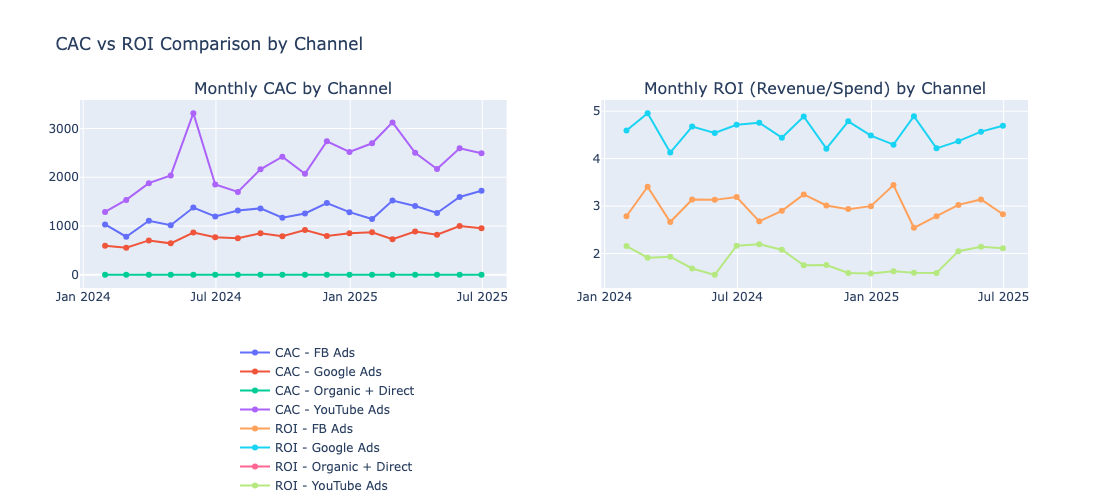

In [47]:
# Compute ROI
monthly["ROI"] = np.where(monthly["spend"] > 0,
                          monthly["revenue"] / monthly["spend"],
                          np.nan)

# Create subplot with two charts
fig = make_subplots(rows=1, cols=2, shared_xaxes=True,
                    subplot_titles=("Monthly CAC by Channel", "Monthly ROI (Revenue/Spend) by Channel"))

# Add CAC traces
for ch in monthly["channel"].unique():
    subset = monthly[monthly["channel"] == ch]
    fig.add_trace(
        go.Scatter(x=subset["month"], y=subset["CAC"], mode="lines+markers", name=f"CAC - {ch}"),
        row=1, col=1
    )

# Add ROI traces
for ch in monthly["channel"].unique():
    subset = monthly[monthly["channel"] == ch]
    fig.add_trace(
        go.Scatter(x=subset["month"], y=subset["ROI"], mode="lines+markers", name=f"ROI - {ch}"),
        row=1, col=2
    )

# Layout improvements
fig.update_layout(
    title="CAC vs ROI Comparison by Channel",
    hovermode="x unified",
    legend=dict(x=0.5, y=-0.2, orientation="h"),  # move legend below
    height=500, width=1000
)

fig.show()


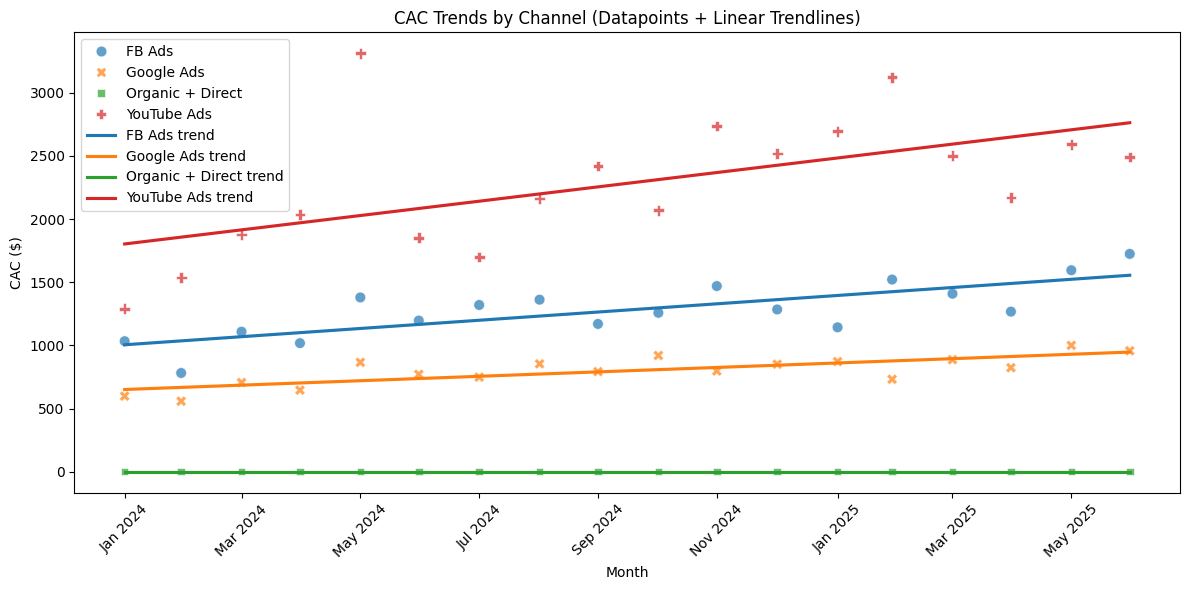

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert month to numeric ordinal
monthly["month_num"] = monthly["month"].map(pd.Timestamp.toordinal)

plt.figure(figsize=(12,6))

# Scatter plot of actual points (using month_num)
sns.scatterplot(
    data=monthly,
    x="month_num",
    y="CAC",
    hue="channel",
    style="channel",
    alpha=0.7,
    s=60
)

# Add regression lines for each channel
for ch in monthly["channel"].unique():
    subset = monthly[monthly["channel"]==ch]
    sns.regplot(
        data=subset,
        x="month_num",
        y="CAC",
        scatter=False,
        ci=None,
        label=f"{ch} trend"
    )

# Fix x-axis ticks back to real month labels
ticks = monthly["month_num"].unique()
plt.xticks(
    ticks=ticks[::2],  # show every 2nd tick for readability
    labels=monthly["month"].dt.strftime("%b %Y").unique()[::2],
    rotation=45
)

plt.xlabel("Month")
plt.ylabel("CAC ($)")
plt.title("CAC Trends by Channel (Datapoints + Linear Trendlines)")
plt.legend()
plt.tight_layout()
plt.show()


In [63]:
# Correlation matrix across channels: orders time series per channel
pivot_orders = df.pivot_table(
    index="month",
    columns="channel",
    values="last_click_orders",
    aggfunc="sum"
).fillna(0)

corr_matrix = pivot_orders.corr()

corr_matrix


channel,FB Ads,Google Ads,Organic + Direct,YouTube Ads
channel,,,,
FB Ads,1.000000,0.562305,0.729959,0.624935
Google Ads,0.562305,1.000000,0.699751,0.139621
Organic + Direct,0.729959,0.699751,1.000000,0.208983
YouTube Ads,0.624935,0.139621,0.208983,1.000000


In [78]:
df = pd.read_csv("channel_performance.csv")

# Query with DuckDB
result = duckdb.query("""
    SELECT 
        month, channel,
        SUM(last_click_add_to_cart) as conversion_add_to_cart, 
        SUM(last_click_orders ) as orders, 
          SUM(last_click_orders)/SUM(last_click_add_to_cart)::float AS conversion_from_add_to_cart_to_orders
    FROM df
    GROUP BY 1,2
    ORDER BY 1 DESC
    """
).to_df()

result

,month,channel,conversion_add_to_cart,orders,conversion_from_add_to_cart_to_orders
0,2025-06-01,Google Ads,235.0,689.0,2.931915
1,2025-06-01,YouTube Ads,82.0,127.0,1.548780
2,2025-06-01,FB Ads,44.0,143.0,3.250000
3,2025-06-01,Organic + Direct,378.0,572.0,1.513227
4,2025-05-01,Organic + Direct,1786.0,547.0,0.306271
...,...,...,...,...,...
67,2024-02-01,Organic + Direct,3140.0,338.0,0.107643
68,2024-01-01,Organic + Direct,4099.0,360.0,0.087826
69,2024-01-01,Google Ads,2681.0,467.0,0.174189
70,2024-01-01,YouTube Ads,186.0,1.0,0.005376


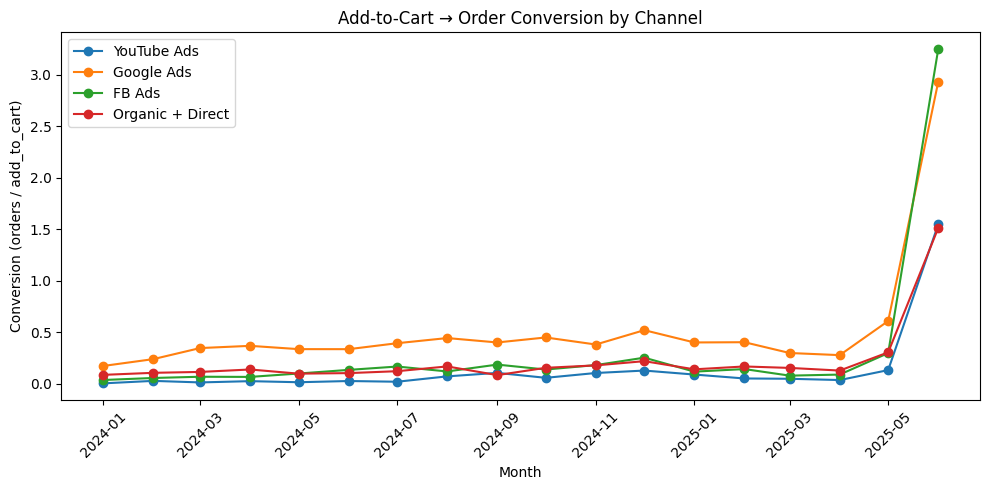

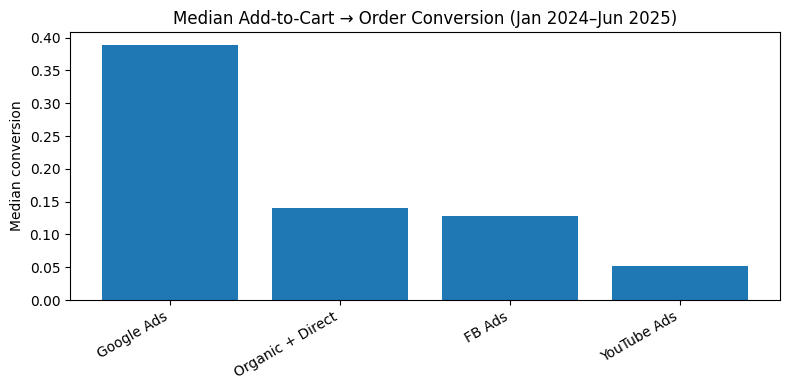

In [86]:
# Load
df = pd.read_csv("channel_performance.csv")
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

# Parse dates
df["month"] = pd.to_datetime(df["month"])

# Clean numerics
for col in df.columns:
    if col in ["channel","month"]:
        continue
    if df[col].dtype == object:
        df[col] = (
            df[col].astype(str)
            .str.replace("[$,]", "", regex=True)
            .str.replace("%","",regex=False)
            .str.strip()
        )
        df[col] = pd.to_numeric(df[col], errors="coerce")

# Rename
df = df.rename(columns={
    "last_click_add_to_cart":"add_to_cart",
    "last_click_orders":"orders",
    "last_click_revenue":"revenue"
})

# Aggregate monthly per channel
monthly = (
    df.groupby(["month","channel"], dropna=False)
      .agg(add_to_cart=("add_to_cart","sum"),
           orders=("orders","sum"))
      .reset_index()
)

# Conversion: add_to_cart -> order
monthly["conv_a2o"] = np.where(monthly["add_to_cart"]>0,
                               monthly["orders"]/monthly["add_to_cart"],
                               np.nan)

# Focus channels
channels = ["YouTube Ads", "Google Ads", "FB Ads", "Organic + Direct"]
plot_df = monthly[monthly["channel"].isin(channels)].copy()

# ---- Chart 1: Time series comparison ----
plt.figure(figsize=(10,5))
for ch in channels:
    cdf = plot_df[plot_df["channel"]==ch].sort_values("month")
    if cdf.empty:
        continue
    plt.plot(cdf["month"], cdf["conv_a2o"], marker="o", label=ch)

plt.title("Add-to-Cart → Order Conversion by Channel")
plt.xlabel("Month")
plt.ylabel("Conversion (orders / add_to_cart)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ---- Chart 2: Median conversion by channel (bar) ----
medians = (
    plot_df.groupby("channel")["conv_a2o"]
           .median()
           .sort_values(ascending=False)
           .reset_index()
)
plt.figure(figsize=(8,4))
plt.bar(medians["channel"], medians["conv_a2o"])
plt.title("Median Add-to-Cart → Order Conversion (Jan 2024–Jun 2025)")
plt.ylabel("Median conversion")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

# ---- Table: YouTube lowest conversion months ----
yt = plot_df[plot_df["channel"]=="YouTube Ads"].sort_values("conv_a2o").head(6).copy()
yt = yt[["month","add_to_cart","orders","conv_a2o"]].round({"conv_a2o":4})
